# 1. Análisis y exploración de los datos
En esta sección cargaremos el conjunto de datos proporcionado y realizaremos un análisis exploratorio.

### 1.1. Carga y exploración del conjunto de datos(dataset)
En este apartado cargaremos el archivo de nuestro dataset (glassdoor_jobs) con pandas, inspeccionaremos su tamaño (filas, columnas), mostraremos las primeras filas para reconocer las columnas disponibles y consultamos un resumen de tipos de datos y ausencia de valores nulos. Esto nos permite entender la estructura general del dataset y confirmar que se ha cargado correctamente

In [29]:
import pandas as pd
import matplotlib.pylab as plt

data = pd.read_csv('Dataset/glassdoor_jobs.csv')

# dimensiones del dataset (filas, columnas)
print('Dimensiones del dataset: ', data.shape)

# primeras 5 filas
data.head() 

Dimensiones del dataset:  (956, 15)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [30]:
### resumen de tipos de datos y ausencia de nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


### 1.2 Análisis estadístico
Calculamos estadísticas descriptivas básicas para las columnas numericas (Rating y Founded) y contamos cuántas categorías distintas hay en algunas columnas categóricas. El objetivo es conocer rangos, medias, desviaciones estándar y la diversidad de valores en cada campo. Esto nos dará una visión general de cómo están distribuidos los datos antes de ser modelos

In [31]:
# Estadísticas descriptivas de las columnas numéricas
data[['Rating', 'Founded']].describe()

# Número de valores únicos en columnas categóricas seleccionadas
categoricas = ['Company Name', 'Location', 'Headquarters', 'Size',
               'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']
for columna in categoricas:
    print(f"{columna}: {data[columna].nunique()} categorías distintas")

Company Name: 448 categorías distintas
Location: 237 categorías distintas
Headquarters: 235 categorías distintas
Size: 9 categorías distintas
Type of ownership: 13 categorías distintas
Industry: 63 categorías distintas
Sector: 25 categorías distintas
Revenue: 14 categorías distintas
Competitors: 149 categorías distintas


### 1.3 Visualización de distribuciones
En esta sección generamos diversos gráficos para visualizar la distribución de algunas variables.
Primero, hacemos un histograma de las calificaciones (Rating) para ver cómo se reparten las puntuaciones de las empresas. Luego, convertimos la columna "Salary Estimate" en tres columnas numéricas (salario mínimo, máximo y promedio), filtramos las filas con salario válido y creamos un histograma del salario promedio. Finalmente, construimos diagramas de barras para las categorías más frecuentes en "Size", "Type of ownership", "Industry" y Sector, lo que te permite identificar cuáles son los grupos más representados en el dataset.

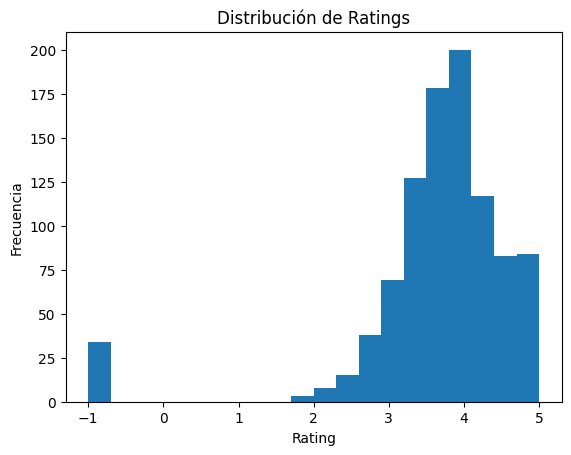

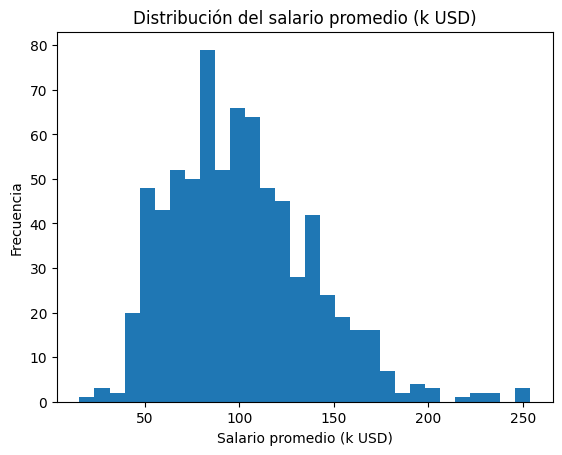

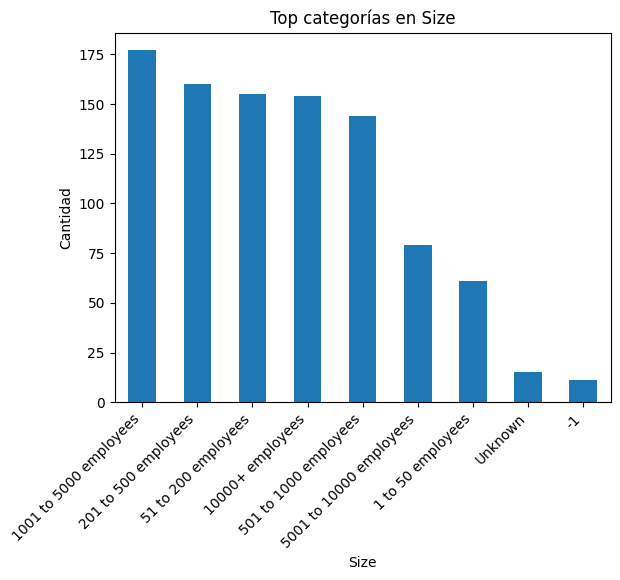

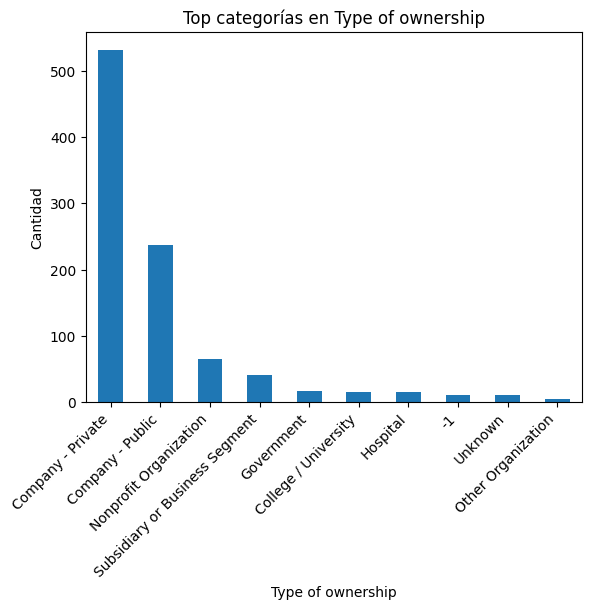

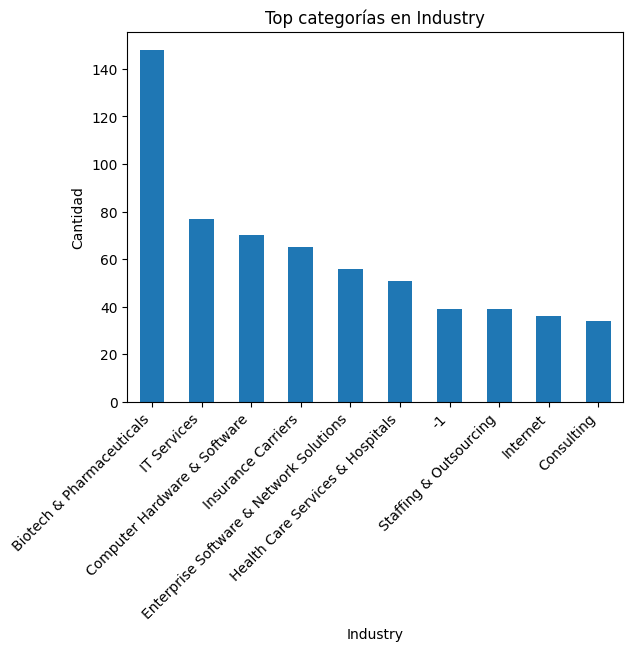

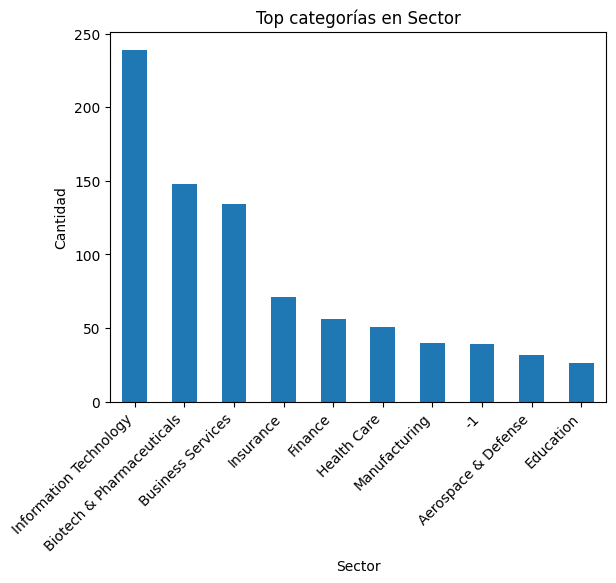

In [32]:
# Histograma de las calificaciones de las empresas
plt.hist(data['Rating'], bins=20)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# Convertir la columna 'Salary Estimate' a valores numéricos (mínimo, máximo y promedio)
import numpy as np

def parse_salary(s):
    s = s.lower()
    if s == '-1':
        return (np.nan, np.nan, np.nan)
    # Quitar texto entre paréntesis y etiquetas adicionales
    rango = s.split('(')[0]
    rango = rango.replace('employer provided salary:', '')
    # Detectar si el salario es por hora
    per_hour = 'per hour' in rango
    rango = rango.replace('per hour', '').strip()
    if '-' not in rango:
        return (np.nan, np.nan, np.nan)
    parte_min, parte_max = rango.split('-')
    def to_num(x):
        x = x.replace('$', '').replace('k', '').strip()
        return float(x) if x else np.nan
    minimo = to_num(parte_min)
    maximo = to_num(parte_max)
    # Ajustar salarios por hora a una escala aproximada comparable
    if per_hour:
        minimo *= 2
        maximo *= 2
    promedio = (minimo + maximo) / 2
    return (minimo, maximo, promedio)

# Aplicar la función a la columna original y crear tres nuevas columnas
# Eliminamos las filas que no tenían información de salario (Salary Estimate = -1 o valores nulos).
data[['salario_min', 'salario_max', 'salario_prom']] = data['Salary Estimate'].apply(parse_salary).apply(pd.Series)
data_sal = data.dropna(subset=['salario_prom'])

# Histograma del salario promedio (en miles de USD)
plt.hist(data_sal['salario_prom'], bins=30)
plt.title('Distribución del salario promedio (k USD)')
plt.xlabel('Salario promedio (k USD)')
plt.ylabel('Frecuencia')
plt.show()

# Diagramas de barras de las categorías más frecuentes
cols_bar = ['Size', 'Type of ownership', 'Industry', 'Sector']
for col in cols_bar:
    conteo = data[col].value_counts().head(10)
    conteo.plot(kind='bar')
    plt.title(f'Top categorías en {col}')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')
    plt.show()


Interpretación:
- En el histograma de Rating se observa que la mayoría de las empresas tienen calificaciones entre 3 y 4,5. Existe un pequeño grupo con valor –1, lo que indica que esos puestos no cuentan con una valoración disponible.

- En el histograma del salario promedio la mayor densidad se concentra entre 50 kUSD y 150 kUSD. La distribución está sesgada hacia la derecha: hay menos ofertas con salarios muy altos (por encima de 200 kUSD) y algunas pocas por debajo de 50 kUSD, que podrían corresponder a puestos junior o remuneraciones por hora.

- En el diagrama de barras de **Size** predominan las empresas medianas y grandes. Las categorías “201 a 500 empleados”, “501 a 1000 empleados” y “1001 a 5000 empleados” son las más numerosas. Las compañías muy pequeñas (1 a 50 empleados) o con tamaño desconocido aparecen con mucha menor frecuencia.

- En el diagrama de barras de **Type of ownership** se aprecia que la mayoría de las ofertas provienen de compañías privadas, seguidas por compañías públicas. Las organizaciones sin ánimo de lucro, subsidiarias, organismos gubernamentales, hospitales y universidades representan un porcentaje mucho menor.

- En el diagrama de barras de **Industry** el sector más representado es *Biotech & Pharmaceuticals*, seguido de *IT Services* y *Computer Hardware & Software*. También destacan los rubros de seguros, software empresarial y servicios de salud. La categoría “–1” agrupa a aquellas ofertas donde la industria no está especificada.

- En el diagrama de barras de **Sector** se nota un claro predominio de *Information Technology*, con *Biotech & Pharmaceuticals* y *Business Services* en segundo y tercer lugar respectivamente. Otros sectores como *Insurance*, *Finance* o *Health Care* aparecen con menor peso, y existe un conjunto de registros sin sector definido (marcados como “–1”).


### 1.4 Análisis de la variable objetivo
En este ultimo punto de nuestro analisis y exploración de los datos, analizaremos en detalle la variable objetivo (el salario) ya convertida a valores númericos. Calcularemos estadísticas resumidas (media, mínimo, máximo, desviación estándar y cuartiles) para los salarios mínimos, máximos y promedios. Estas métricas permitirán entender el rango y la dispersión del salario antes de entrenar cualquier modelo de predicción

In [33]:
# Estadísticas de los salarios ya convertidos (mínimo, máximo y promedio)
data_sal[['salario_min', 'salario_max', 'salario_prom']].describe()

,salario_min,salario_max,salario_prom
count,742.000000,742.000000,742.000000
mean,74.719677,128.149596,101.434636
std,30.980593,45.220324,37.546122
min,15.000000,16.000000,15.500000
25%,52.000000,96.000000,73.500000
50%,69.500000,124.000000,97.500000
75%,91.000000,155.000000,122.500000
max,202.000000,306.000000,254.000000


- **count**: número de observaciones o registros utilizados para calcular las estadísticas (742 porque eliminamos de los 956 registros los que tenían Salary Estimate = -1 o valores nulos).
- **mean**: media aritmética; el promedio de todos los valores de la columna.
- **std**: desviación estándar; mide cuánto se dispersan los datos en torno a la media.
- **min**: valor mínimo observado en la columna.
- **25 %**: primer cuartil (Q1); el 25 % de los datos están por debajo de este valor.
- **50 %**: mediana (Q2); el 50 % de los datos están por debajo de este valor.
- **75 %**: tercer cuartil (Q3); el 75 % de los datos están por debajo de este valor.
- **max**: valor máximo observado en la columna.


# 2. Preprocesamiento de los datos

### 2.1 Limpieza de datos

En este paso depuramos el dataset para eliminar columnas innecesarias, convertir la variable salarial a valores numéricos, eliminar registros sin salario disponible y sustituir marcadores de “datos desconocidos” (-1) por valores nulos en las columnas numéricas.

In [34]:
import pandas as pd
import numpy as np

In [35]:
# Cargar el archivo original
data = pd.read_csv('DataSet/glassdoor_jobs.csv')

In [36]:
# Eliminar la columna índice innecesaria
data = data.drop(columns=['Unnamed: 0'])

In [37]:
# Función para convertir la columna de salarios en tres columnas numéricas
def parse_salary(s):
    s = s.lower()
    if s == '-1':
        return (np.nan, np.nan, np.nan)
    rango = s.split('(')[0]
    rango = rango.replace('employer provided salary:', '')
    per_hour = 'per hour' in rango
    rango = rango.replace('per hour', '').strip()
    if '-' not in rango:
        return (np.nan, np.nan, np.nan)
    parte_min, parte_max = rango.split('-')
    def to_num(x):
        x = x.replace('$', '').replace('k', '').strip()
        return float(x) if x else np.nan
    minimo = to_num(parte_min)
    maximo = to_num(parte_max)
    if per_hour:
        minimo *= 2
        maximo *= 2
    promedio = (minimo + maximo) / 2
    return (minimo, maximo, promedio)

# Crear nuevas columnas para el salario mínimo, máximo y promedio
data[['salario_min','salario_max','salario_prom']] = data['Salary Estimate'].apply(parse_salary).apply(pd.Series)

# Mantener solo registros con salario válido
data = data.dropna(subset=['salario_prom'])

# Reemplazar -1 por NaN en columnas numéricas (rating y año de fundación)
data['Rating'] = data['Rating'].replace(-1, np.nan)
data['Founded'] = data['Founded'].replace(-1, np.nan)

# Eliminar columnas de texto no procesadas que no se usarán directamente
data = data.drop(columns=['Salary Estimate', 'Job Description', 'Competitors', 'Company Name', 'Location', 'Headquarters'])

# Verificar la estructura resultante
data.head()

,Job Title,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,salario_min,salario_max,salario_prom
0,Data Scientist,3.8,501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53.0,91.0,72.0
1,Healthcare Data Scientist,3.4,10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63.0,112.0,87.5
2,Data Scientist,4.8,501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80.0,90.0,85.0
3,Data Scientist,3.8,1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56.0,97.0,76.5
4,Data Scientist,2.9,51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86.0,143.0,114.5


### 2.2 Normalización de los datos

Para que todas las variables numéricas estén en un rango comparable, aplicamos la normalización MinMax a los campos numéricos (salarios, rating y año de fundación). Esto ayuda a que la red neuronal converge mejor.

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Identificar las columnas numéricas a normalizar
cols_numericas = ['salario_min', 'salario_max', 'salario_prom', 'Rating', 'Founded']

# Crear un objeto MinMaxScaler y ajustar los datos
normalizador = MinMaxScaler()
data[cols_numericas] = normalizador.fit_transform(data[cols_numericas])

# Mostrar las primeras filas para comprobar la normalización
data.head()


,Job Title,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,salario_min,salario_max,salario_prom
0,Data Scientist,0.612903,501 to 1000 employees,0.832727,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0.203209,0.258621,0.236897
1,Healthcare Data Scientist,0.483871,10000+ employees,0.872727,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0.256684,0.331034,0.301887
2,Data Scientist,0.935484,501 to 1000 employees,0.967273,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0.347594,0.255172,0.291405
3,Data Scientist,0.612903,1001 to 5000 employees,0.803636,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0.219251,0.279310,0.255765
4,Data Scientist,0.322581,51 to 200 employees,0.923636,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0.379679,0.437931,0.415094


### 2.3 Categorización de la variable objetivo (clasificación)

Aunque nuestro objetivo principal es predecir un valor continuo de salario, podemos reformular el problema como clasificación dividiendo el salario promedio en tres clases de igual frecuencia (bajo, medio y alto) mediante pd.qcut. De esta forma evitamos desequilibrios entre clases.

In [39]:
# Crear una columna de categorías de salario con tres grupos de igual tamaño
data['categoria_salario'] = pd.qcut(data['salario_prom'], q=3, labels=['Bajo','Medio','Alto'])

# Revisar la distribución de las clases
data['categoria_salario'].value_counts()


categoria_salario
Bajo     248
Alto     248
Medio    246
Name: count, dtype: int64

### 2.4 Balanceo de clases (si es necesario)

Como hemos creado las categorías usando quantiles, cada grupo tendrá prácticamente el mismo número de registros, por lo que no es necesario balancear. Si en otra clasificación los grupos estuvieran desbalanceados, podrías aplicar sobremuestreo de las clases minoritarias con el método resample como ejemplo.

In [ ]:
# Ejemplo opcional de balanceo (no necesario con qcut)
from sklearn.utils import resample

# Distribución actual (debería ser equilibrada)
data['categoria_sa  lario'].value_counts()

# Si una clase tuviera pocos ejemplos, puedes re-muestrear así:
# mayoria = data[data['categoria_salario']=='Medio']
# minoria_bajo = data[data['categoria_salario']=='Bajo']
# minoria_alto = data[data['categoria_salario']=='Alto']
# minoria_bajo_over = resample(minoria_bajo, replace=True, n_samples=len(mayoria), random_state=42)
# minoria_alto_over = resample(minoria_alto, replace=True, n_samples=len(mayoria), random_state=42)
# data_balanceado = pd.concat([mayoria, minoria_bajo_over, minoria_alto_over])
# data_balanceado['categoria_salario'].value_counts()


categoria_salario
Bajo     248
Alto     248
Medio    246
Name: count, dtype: int64

### 2.5 División del conjunto de datos (entrenamiento, validación y prueba)

Por último, convertimos las variables categóricas en variables numéricas mediante one-hot encoding, definimos X (características) e y (objetivo), y dividimos el conjunto en tres subconjuntos: entrenamiento, validación y prueba (70 %, 15 % y 15 %). Usamos stratify para mantener la proporción de cada categoría de salario en los tres conjuntos.

In [41]:
from sklearn.model_selection import train_test_split

# Realizar codificación one-hot de las columnas categóricas (eliminando la primera categoría para evitar colinealidad)
data_cod = pd.get_dummies(data, drop_first=True)

# Definir características (X) y etiqueta (y) para clasificación
X = data_cod.drop(columns=['categoria_salario'])
y = data_cod['categoria_salario']

# Primera división: 70 % entrenamiento, 30 % restante
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Segunda división: 15 % validación, 15 % prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Mostrar tamaños de cada subconjunto
(len(X_train), len(X_val), len(X_test))


KeyError: "['categoria_salario'] not found in axis"